# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Muhammad Ali Pratama Putra
- **Email:** aliepratama2@gmail.com
- **ID Dicoding:** aliepratama

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi penjualan di berbagai wilayah?
- Jenis pembayaran mana yang paling banyak digunakan oleh pelanggan?
- Berapa persentase pesanan yang berhasil, dibatalkan, atau dikembalikan?
- Bulan atau periode mana yang mengalami peningkatan atau penurunan pembeli?
- Bagaimana pendapatan sepanjang tahun?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import geopandas as gpd
from shapely.geometry import Point

## Data Wrangling

### Gathering Data

In [6]:
CURRENT_DIR = './data/'

In [7]:
customers_df = pd.read_csv(CURRENT_DIR + 'customers_dataset.csv')
customers_df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [8]:
sellers_df = pd.read_csv(CURRENT_DIR + 'sellers_dataset.csv')
sellers_df.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [9]:
orders_df = pd.read_csv(CURRENT_DIR + 'orders_dataset.csv')
orders_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [40]:
order_payments_df = pd.read_csv(CURRENT_DIR + 'order_payments_dataset.csv')
order_payments_df.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [41]:
geolocation_df = pd.read_csv(CURRENT_DIR + 'geolocation_dataset.csv')
geolocation_df.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Insight:**
- Terdapat 5 dataset yang akan dibutuhkan
- Dataset ini saling berhubungan, sehingga nanti akan ada operasi join

### Assessing Data

In [11]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
print("Jumlah NaN:", customers_df.isna().sum().sum())
print("Jumlah Duplikat:", customers_df.duplicated().sum())

Jumlah NaN: 0
Jumlah Duplikat: 0


In [13]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [14]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [15]:
print("Jumlah NaN:", sellers_df.isna().sum().sum())
print("Jumlah Duplikat:", sellers_df.duplicated().sum())

Jumlah NaN: 0
Jumlah Duplikat: 0


In [16]:
sellers_df.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [17]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [18]:
print("Jumlah NaN:", orders_df.isna().sum().sum())
print("Jumlah Duplikat:", orders_df.duplicated().sum())

Jumlah NaN: 4908
Jumlah Duplikat: 0


In [19]:
orders_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [20]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [21]:
print("Jumlah NaN:", order_payments_df.isna().sum().sum())
print("Jumlah Duplikat:", order_payments_df.duplicated().sum())

Jumlah NaN: 0
Jumlah Duplikat: 0


In [22]:
order_payments_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


**Insight:**
- Terdapat beberapa data yang missing pada orders_df
- Beberapa fitur yang ada di orders_df tidak sesuai tipedatanya (datetime)

### Cleaning Data

In [23]:
orders_df.dropna(inplace=True)
orders_df.shape

(96461, 8)

In [24]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

**Insight:**
- missing value pada orders_df berhasil dihapus
- tipedata tanggal sudah benar pada orders_df

## Exploratory Data Analysis (EDA)

### Explore ...

In [42]:
geolocation_join = customers_df.join(geolocation_df.set_index('geolocation_zip_code_prefix'), on='customer_zip_code_prefix', how='inner')
geolocation_join.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,franca,SP
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.497396,-47.399241,franca,SP
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.510459,-47.399553,franca,SP
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.480940,-47.394161,franca,SP
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.515413,-47.398194,franca,SP


In [44]:
groupby_city = geolocation_join.groupby(by='customer_city') \
    .agg(jumlah=pd.NamedAgg(column='customer_city', aggfunc='count'),
        lat=pd.NamedAgg(column='geolocation_lat', aggfunc='first'),
        lng=pd.NamedAgg(column='geolocation_lng', aggfunc='first')) \
    .sort_values(by='jumlah', ascending=False)
groupby_city

,jumlah,lat,lng
customer_city,,,
rio de janeiro,1913966,-22.911641,-43.183547
sao paulo,1372374,-23.527788,-46.660310
belo horizonte,737548,-19.970076,-43.979595
niteroi,452857,-22.882483,-43.088661
curitiba,255744,-25.496853,-49.209023
...,...,...,...
guarapua,1,-22.250352,-48.384641
termas de ibira,1,-21.081026,-49.241642
lagoa salgada,1,-6.122106,-35.475279


In [45]:
groupby_city.reset_index(inplace=True)
groupby_city

,customer_city,jumlah,lat,lng
0,rio de janeiro,1913966,-22.911641,-43.183547
1,sao paulo,1372374,-23.527788,-46.660310
2,belo horizonte,737548,-19.970076,-43.979595
3,niteroi,452857,-22.882483,-43.088661
4,curitiba,255744,-25.496853,-49.209023
...,...,...,...,...
4069,guarapua,1,-22.250352,-48.384641
4070,termas de ibira,1,-21.081026,-49.241642
4071,lagoa salgada,1,-6.122106,-35.475279
4072,cambiasca,1,-21.714720,-41.925000


In [85]:
groupby_payment = order_payments_df.groupby(by='payment_type') \
    .agg(jumlah=pd.NamedAgg(column='payment_type', aggfunc='count')) \
    .sort_values(by='jumlah', ascending=False) \
    .reset_index()
groupby_payment

,payment_type,jumlah
0,credit_card,76795
1,boleto,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


In [93]:
groupby_order = orders_df.groupby(by='order_status') \
    .agg(jumlah=pd.NamedAgg(column='order_status', aggfunc='count')) \
    .sort_values(by='jumlah', ascending=False) \
    .reset_index()
groupby_order

,order_status,jumlah
0,delivered,96455
1,canceled,6


In [28]:
orders_join = orders_df.join(order_payments_df.set_index('order_id'), on='order_id', how='inner')
orders_join.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3,voucher,1,2.00
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2,voucher,1,18.59
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,boleto,1,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,credit_card,3,179.12


In [29]:
orders_join['order_purchase_timestamp'] = pd.to_datetime(orders_join['order_purchase_timestamp'])

In [30]:
monthly_orders = orders_join.resample('ME', on='order_purchase_timestamp').agg({
    'order_status': 'count',
    'payment_value': 'sum'
})
monthly_orders.index = monthly_orders.index.strftime('%Y-%m')
monthly_orders

,order_status,payment_value
order_purchase_timestamp,,
2016-10,287,47271.20
2016-11,0,0.00
2016-12,1,19.62
2017-01,797,127430.74
2017-02,1737,269458.98
2017-03,2700,414369.39
2017-04,2436,390952.18
2017-05,3786,566872.73
2017-06,3323,490225.60


**Insight:**
- Melakukan agregasi berdasarkan wilayah
- Melakukan agregasi berdasarkan jenis pembayaran
- Melakukan agregasi berdasarkan status pesanan
- Melakukan agregasi jumlah pembeli dan jumlah pembayaran berdasarkan bulan transaksi

## Visualization & Explanatory Analysis

### Bagaimana distribusi penjualan di berbagai wilayah?

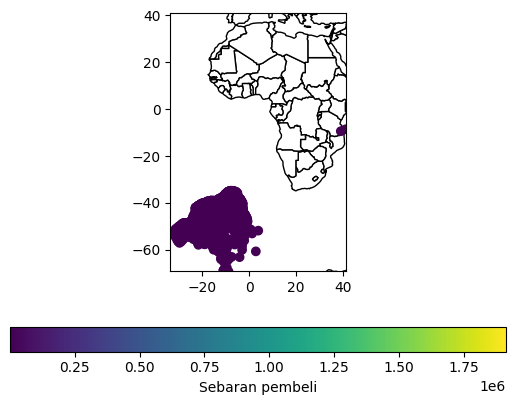

In [84]:
from geodatasets import get_path
top_20_point = groupby_city.iloc[:4000]
geo_df = gpd.GeoDataFrame(top_20_point, geometry=gpd.points_from_xy(top_20_point['lat'], top_20_point['lng']))
# Muat peta dasar Brazil
world = gpd.read_file('./data/110m_cultural/ne_110m_admin_0_map_units.shp')
# Plot
fig, ax = plt.subplots()
ax.set_xlim([top_20_point['lat'].min(), top_20_point['lat'].max()])
ax.set_ylim([top_20_point['lng'].min(), top_20_point['lat'].max()])
world.plot(ax=ax, color='white', edgecolor='black')
geo_df.plot(ax=ax, column='jumlah', legend=True, legend_kwds={"label": "Sebaran pembeli", "orientation": "horizontal"})
plt.show()

### Jenis pembayaran mana yang paling banyak digunakan oleh pelanggan?

<ipython-input-92-0f7d62f97dfb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='jumlah', y='payment_type', data=groupby_payment, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarnin

Text(0, 0.5, 'Jumlah pembeli')

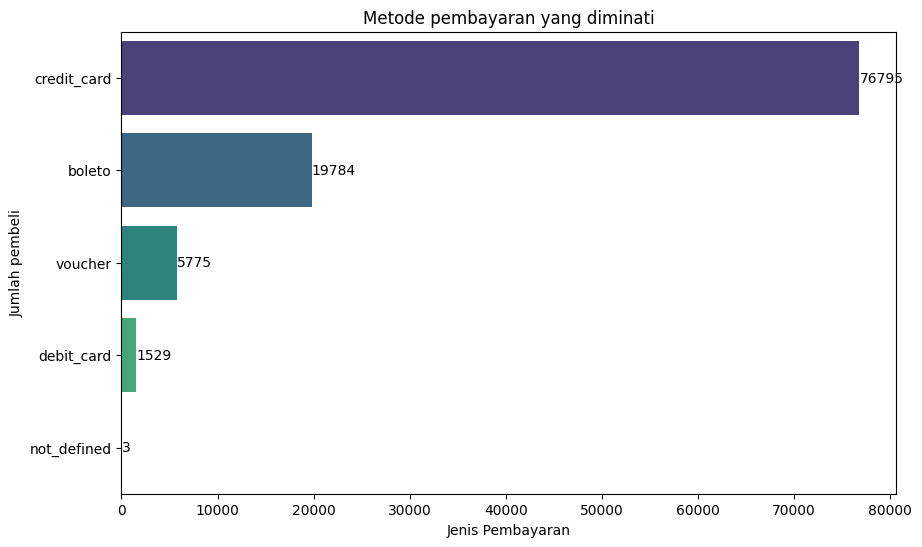

In [92]:
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='jumlah', y='payment_type', data=groupby_payment, palette='viridis')
for bar in bar_plot.patches:
    bar_value = bar.get_width()
    text = f'{bar_value:.0f}'
    text_x = bar.get_x() + bar_value + 10
    bar_plot.annotate(text, xy=(text_x, bar.get_y() + bar.get_height() / 2), va='center')
plt.title('Metode pembayaran yang diminati')
plt.xlabel('Jenis Pembayaran')
plt.ylabel('Jumlah pembeli')

### Berapa persentase pesanan yang berhasil, dibatalkan, atau dikembalikan?

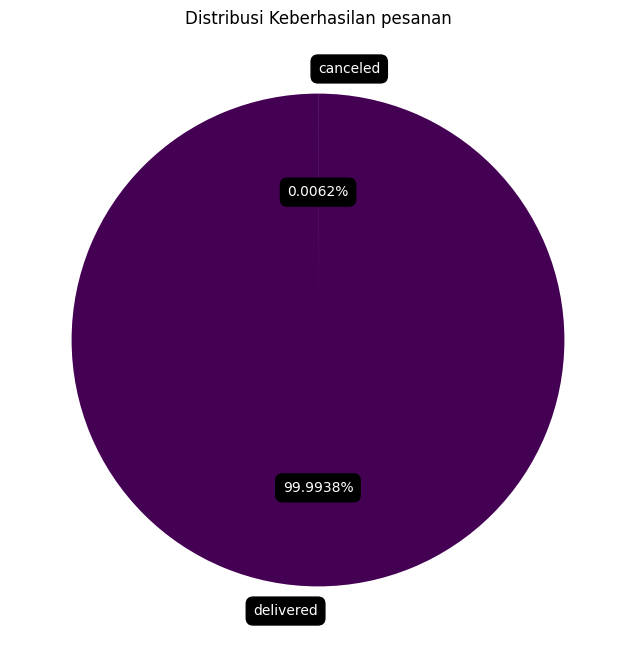

In [102]:
plt.figure(figsize=(8, 8))
plt.pie(groupby_order['jumlah'], labels=groupby_order['order_status'],
        autopct='%1.4f%%', startangle=90, colors=plt.cm.viridis(range(len(groupby_order))),
        textprops={
            'color': 'white',
            'bbox': dict(facecolor='black', edgecolor='black', boxstyle='round,pad=0.5')
            })
plt.title('Distribusi Keberhasilan pesanan')
plt.show()

### Bulan atau periode mana yang mengalami peningkatan atau penurunan pembeli?

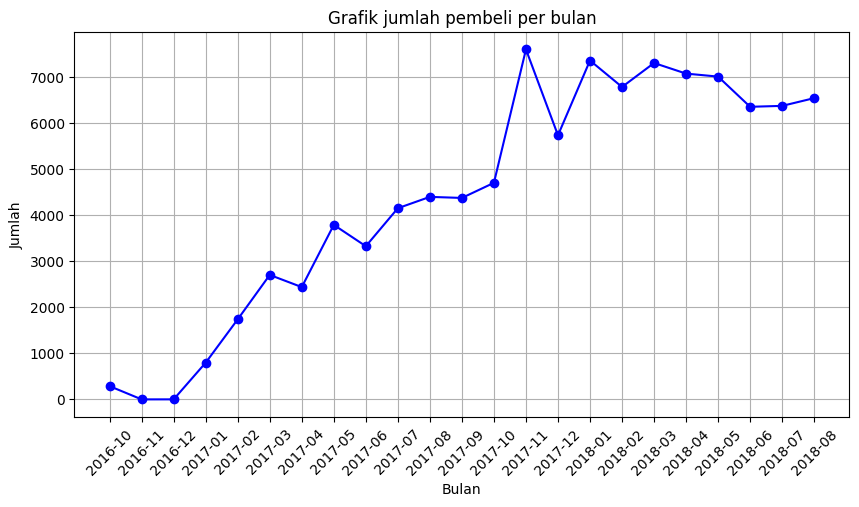

In [110]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_orders.index, monthly_orders['order_status'], marker='o', linestyle='-', color='blue')
plt.title('Grafik jumlah pembeli per bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.grid(True)

plt.xticks(rotation=45)

plt.show()


### Bagaimana pendapatan sepanjang tahun?

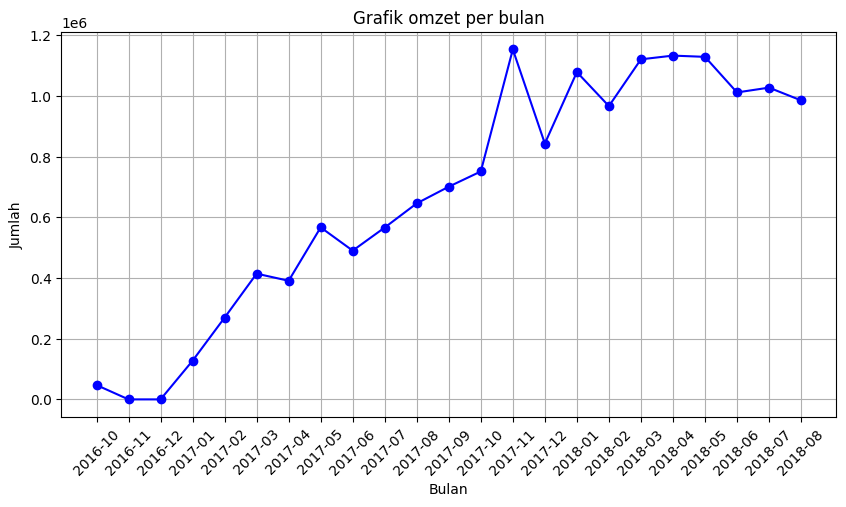

In [111]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_orders.index, monthly_orders['payment_value'], marker='o', linestyle='-', color='blue')
plt.title('Grafik omzet per bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.grid(True)

plt.xticks(rotation=45)

plt.show()

**Insight:**
- Pembeli banyak dari Brazil
- Pembeli sering menggunakan metode pembayaran kartu kredit
- 99,9% pesanan sukses diantar
- Jumlah pembeli memiliki kenaikan
- Tren pendapatan juga memiliki kenaikan

## Conclusion

**1. Pasar Brazil Sebagai Pusat Pertumbuhan**

Konklusi ini didasarkan pada fakta bahwa banyak pembeli berasal dari Brazil. Ini menunjukkan bahwa pasar Brazil memiliki potensi yang signifikan dan bisa dijadikan fokus utama dalam strategi ekspansi dan peningkatan penjualan. Menyusun kampanye pemasaran yang ditargetkan dan meningkatkan kapasitas logistik atau distribusi di Brazil bisa menjadi langkah strategis untuk memaksimalkan potensi pasar ini.

**2. Optimasi Proses Pembayaran via Kartu Kredit**

Mengingat popularitas metode pembayaran kartu kredit, memastikan bahwa proses pembayaran menggunakan kartu kredit berjalan lancar dan aman merupakan hal yang krusial. Ini termasuk investasi dalam teknologi keamanan, memastikan proses transaksi cepat, dan mungkin menawarkan insentif untuk pembayaran melalui metode ini. Lebih lanjut, menggali data untuk memahami mengapa metode ini disukai dan bagaimana dapat lebih memperkuat loyalitas pelanggan melalui penawaran yang berhubungan dengan penggunaan kartu kredit bisa membantu meningkatkan volume penjualan.

**3. Sustainability dan Ekspansi Berdasarkan Performa Pesanan dan Pertumbuhan Pendapatan**

Tingkat keberhasilan pengiriman pesanan yang sangat tinggi (99,9%) menunjukkan efisiensi operasional yang tinggi dan keandalan layanan yang bisa menjadi nilai jual utama dalam komunikasi pemasaran. Selain itu, kenaikan jumlah pembeli dan tren pendapatan yang positif menunjukkan momentum pertumbuhan yang sehat. Strategi yang berkelanjutan dan terukur untuk mempertahankan dan memperkuat tren ini perlu diterapkan, termasuk ekspansi pasar, diversifikasi produk, dan meningkatkan kualitas layanan pelanggan untuk mendukung retensi pembeli.